In [3]:
%pwd

'/home/jovyan/work'

In [4]:
# import pandas as pd

# Load the dataset
file_path = '/home/jovyan/work/credit_risk.csv'
data = pd.read_csv(file_path)
print(data.head())

   Id  Age  Income      Home  ...  Status Percent_income  Default  Cred_length
0   0   22   59000      RENT  ...       1           0.59        Y            3
1   1   21    9600       OWN  ...       0           0.10        N            2
2   2   25    9600  MORTGAGE  ...       1           0.57        N            3
3   3   23   65500      RENT  ...       1           0.53        N            2
4   4   24   54400      RENT  ...       1           0.55        Y            4

[5 rows x 12 columns]


In [17]:
# Dataset global information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [28]:
display(data.describe(include=['object']))

,Home,Intent,Default
count,32581,32581,32581
unique,4,6,2
top,RENT,EDUCATION,N
freq,16446,6453,26836


In [6]:
# Display a general overview of the dataset
general_properties = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Columns": list(data.columns),
    "Missing Values": data.isnull().sum().to_dict(),
    "Duplicated Rows": data.duplicated().sum(),
    "Data Types": data.dtypes.to_dict(),
}
general_properties

{'Number of Rows': 32581,
 'Number of Columns': 12,
 'Columns': ['Id',
  'Age',
  'Income',
  'Home',
  'Emp_length',
  'Intent',
  'Amount',
  'Rate',
  'Status',
  'Percent_income',
  'Default',
  'Cred_length'],
 'Missing Values': {'Id': 0,
  'Age': 0,
  'Income': 0,
  'Home': 0,
  'Emp_length': 895,
  'Intent': 0,
  'Amount': 0,
  'Rate': 3116,
  'Status': 0,
  'Percent_income': 0,
  'Default': 0,
  'Cred_length': 0},
 'Duplicated Rows': np.int64(0),
 'Data Types': {'Id': dtype('int64'),
  'Age': dtype('int64'),
  'Income': dtype('int64'),
  'Home': dtype('O'),
  'Emp_length': dtype('float64'),
  'Intent': dtype('O'),
  'Amount': dtype('int64'),
  'Rate': dtype('float64'),
  'Status': dtype('int64'),
  'Percent_income': dtype('float64'),
  'Default': dtype('O'),
  'Cred_length': dtype('int64')}}

In [7]:
# Separate numerical and categorical variables
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [8]:
# Describe numerical variables
numerical_description = data[numerical_vars].describe().to_dict()

In [9]:
numerical_description

{'Id': {'count': 32581.0,
  'mean': 16290.006138547005,
  'std': 9405.479594065157,
  'min': 0.0,
  '25%': 8145.0,
  '50%': 16290.0,
  '75%': 24435.0,
  'max': 32780.0},
 'Age': {'count': 32581.0,
  'mean': 27.73459992019889,
  'std': 6.3480784192252475,
  'min': 20.0,
  '25%': 23.0,
  '50%': 26.0,
  '75%': 30.0,
  'max': 144.0},
 'Income': {'count': 32581.0,
  'mean': 66074.84846996715,
  'std': 61983.119168159064,
  'min': 4000.0,
  '25%': 38500.0,
  '50%': 55000.0,
  '75%': 79200.0,
  'max': 6000000.0},
 'Emp_length': {'count': 31686.0,
  'mean': 4.789686296787225,
  'std': 4.142630148887972,
  'min': 0.0,
  '25%': 2.0,
  '50%': 4.0,
  '75%': 7.0,
  'max': 123.0},
 'Amount': {'count': 32581.0,
  'mean': 9589.371105859243,
  'std': 6322.086645792174,
  'min': 500.0,
  '25%': 5000.0,
  '50%': 8000.0,
  '75%': 12200.0,
  'max': 35000.0},
 'Rate': {'count': 29465.0,
  'mean': 11.011694892245036,
  'std': 3.2404594649559195,
  'min': 5.42,
  '25%': 7.9,
  '50%': 10.99,
  '75%': 13.47,
  

In [38]:
data.isna()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Describe categorical variables
categorical_description = {var: data[var].value_counts().to_dict() for var in categorical_vars}

In [11]:
categorical_description

{'Home': {'RENT': 16446, 'MORTGAGE': 13444, 'OWN': 2584, 'OTHER': 107},
 'Intent': {'EDUCATION': 6453,
  'MEDICAL': 6071,
  'VENTURE': 5719,
  'PERSONAL': 5521,
  'DEBTCONSOLIDATION': 5212,
  'HOMEIMPROVEMENT': 3605},
 'Default': {'N': 26836, 'Y': 5745}}

In [18]:
# Global structure and relationships (correlation matrix for numerical variables)
correlation_matrix = data[numerical_vars].corr()
correlation_matrix

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
Id,1.000000,0.734248,0.170488,0.186934,0.100978,0.001918,-0.060256,-0.069398,0.772918
Age,0.734248,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
Income,0.170488,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
Emp_length,0.186934,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
Amount,0.100978,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
Rate,0.001918,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
Status,-0.060256,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
Percent_income,-0.069398,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
Cred_length,0.772918,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [ ]:
# Visualization Steps

In [32]:
%run utilities.ipynb # not working

In [14]:
# Classic import from a module
from utilities import DataVisualizer, DataExplorer

/home/jovyan/work/utilities.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=data, palette="viridis")


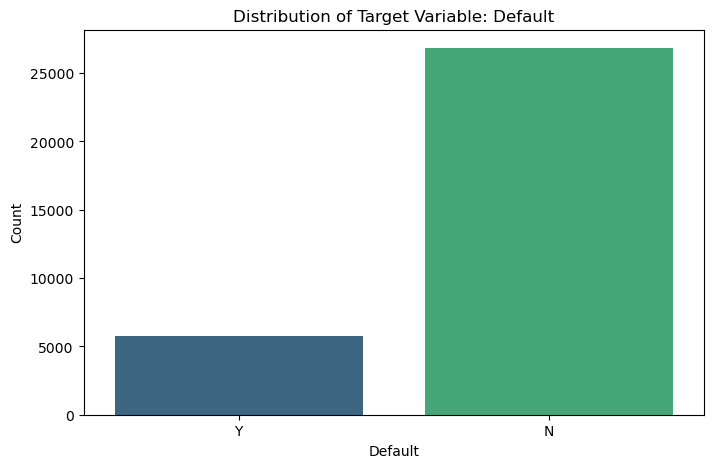

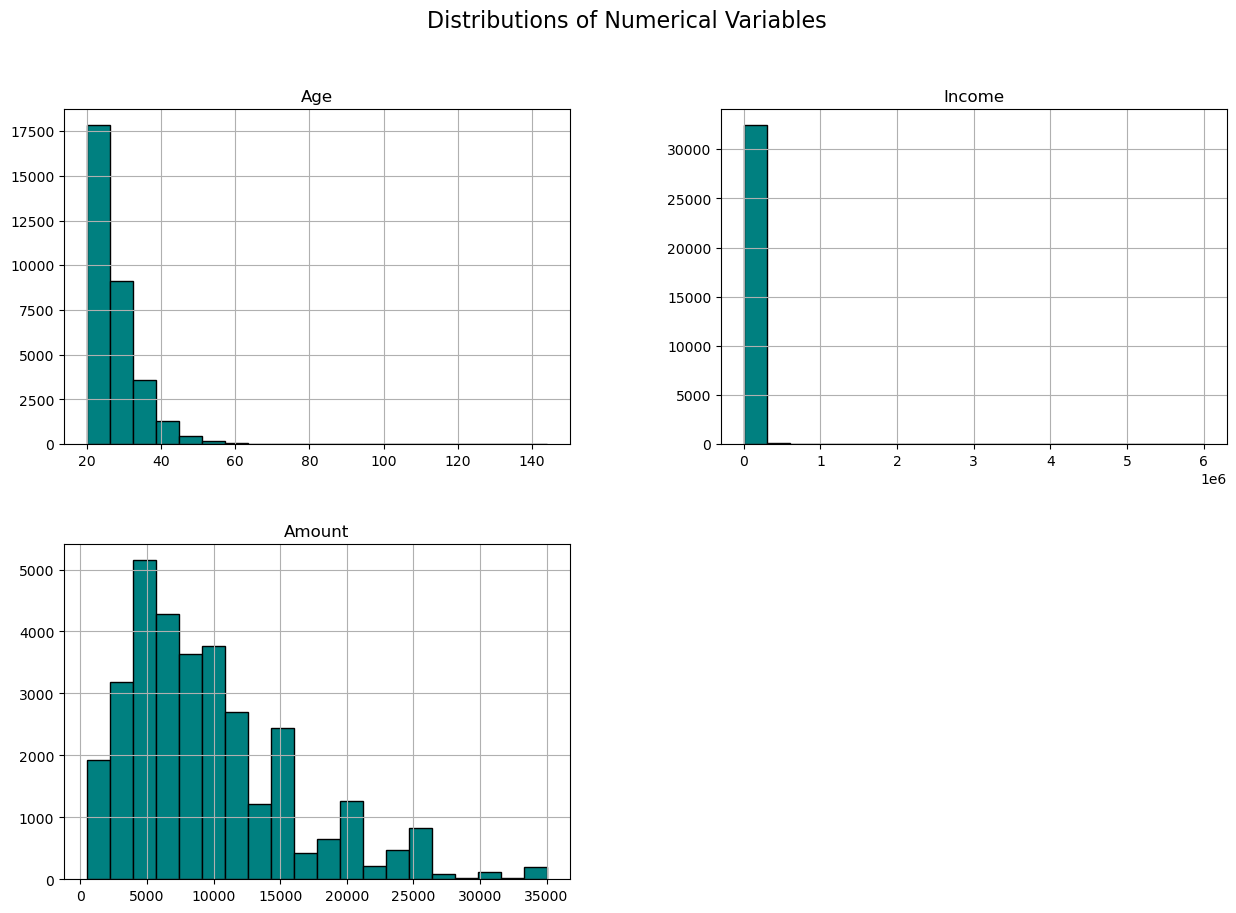

/home/jovyan/work/utilities.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=data, palette="crest", order=data[var].value_counts().index)


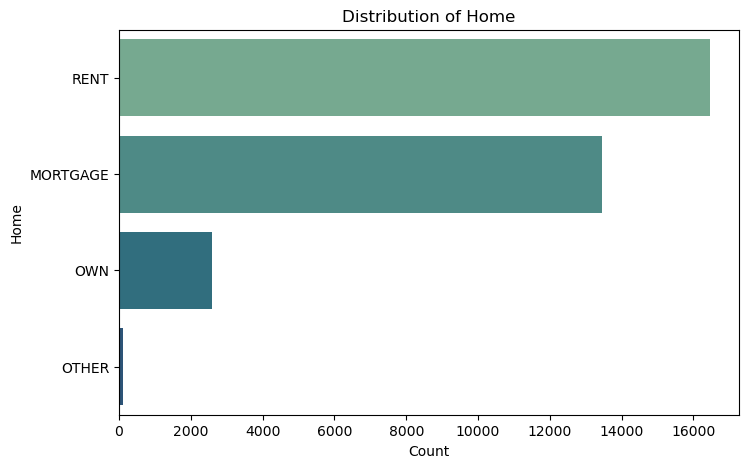

/home/jovyan/work/utilities.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=data, palette="crest", order=data[var].value_counts().index)


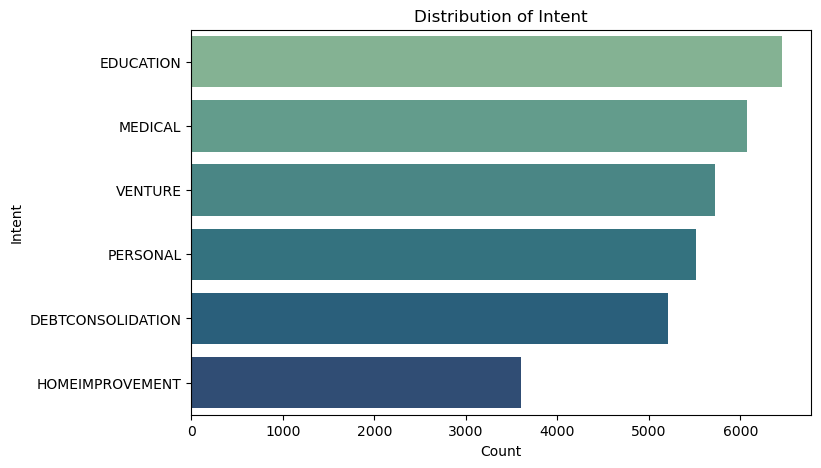

In [21]:
# Visualize data using the DataVisualizer class
DataVisualizer.plot_target_distribution(data, target='Default')
DataVisualizer.plot_numerical_distributions(data, numerical_vars=['Age', 'Income', 'Amount'])
DataVisualizer.plot_categorical_distributions(data, categorical_vars=['Home', 'Intent'])

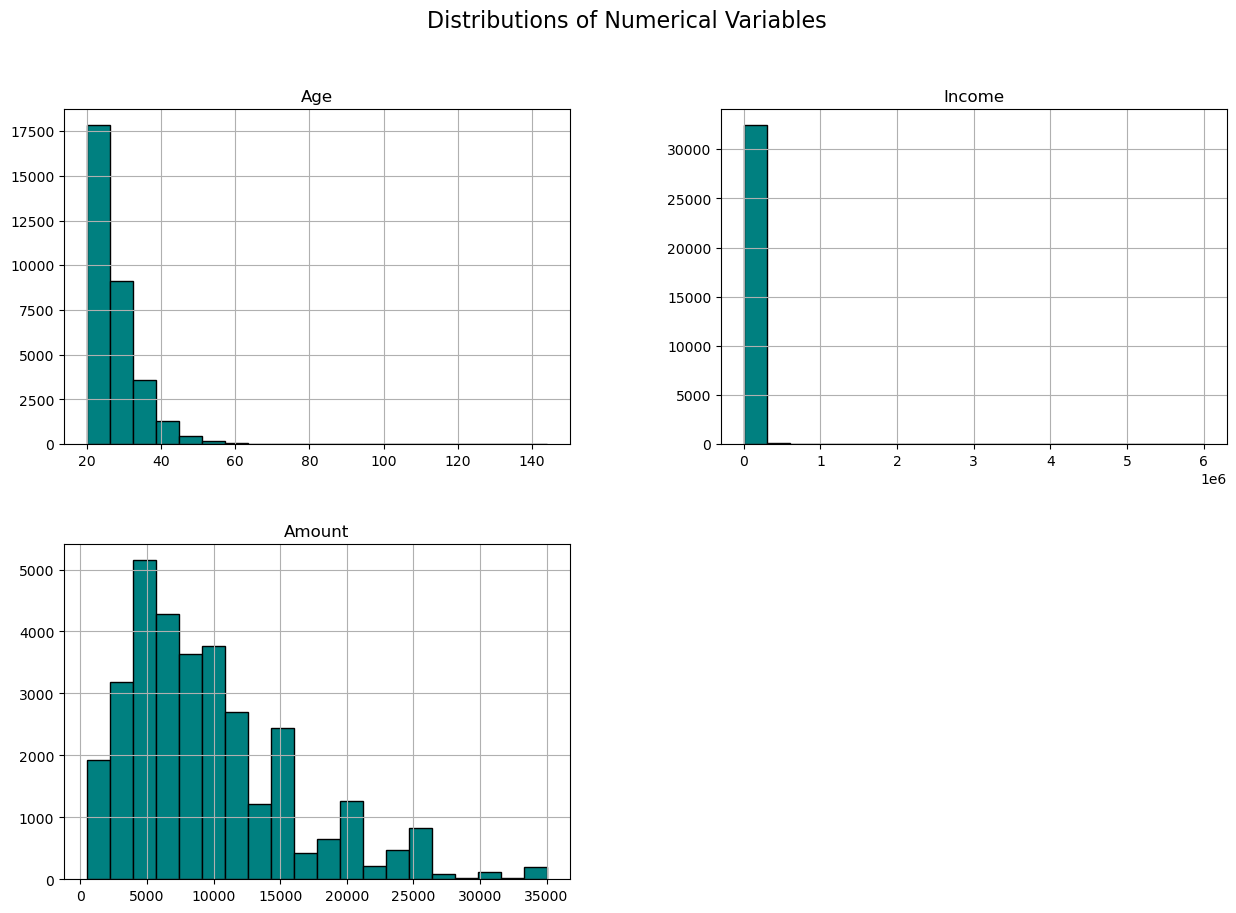

In [33]:
DataVisualizer.plot_numerical_distributions(data, numerical_vars=['Age', 'Income', 'Amount'])

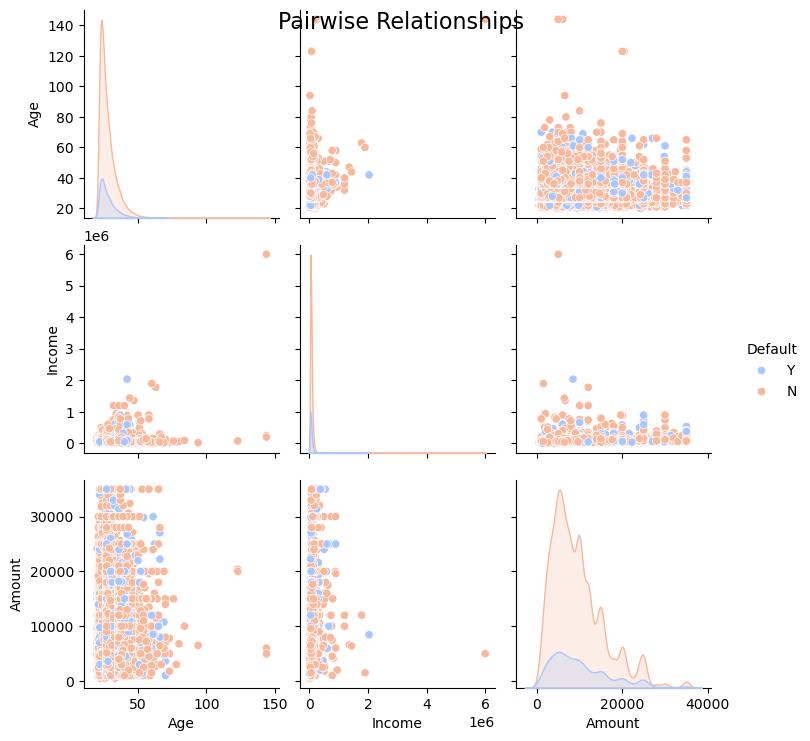

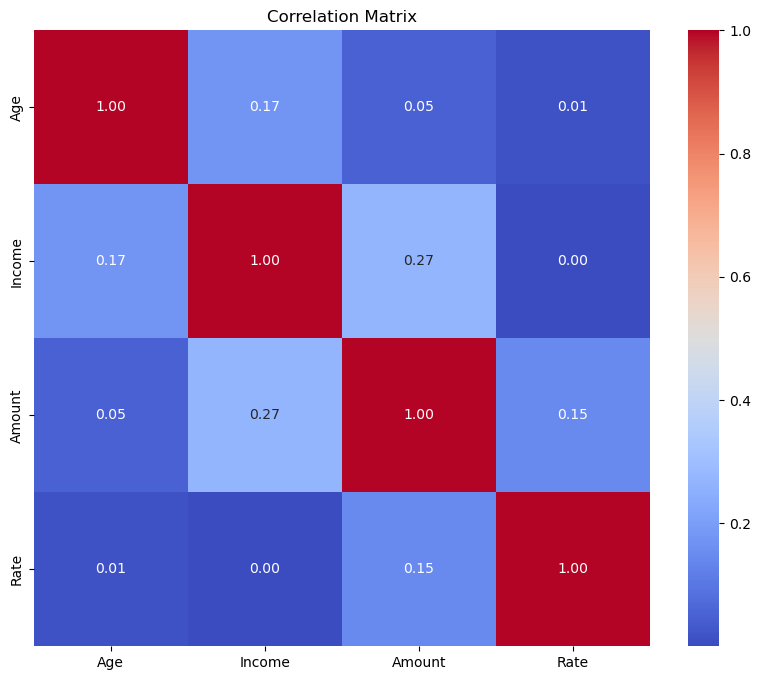

In [30]:
DataVisualizer.plot_pairwise_relationships(data, numerical_vars=['Age', 'Income', 'Amount'], target='Default')
DataVisualizer.plot_correlation_matrix(data, numerical_vars=['Age', 'Income', 'Amount', 'Rate'])

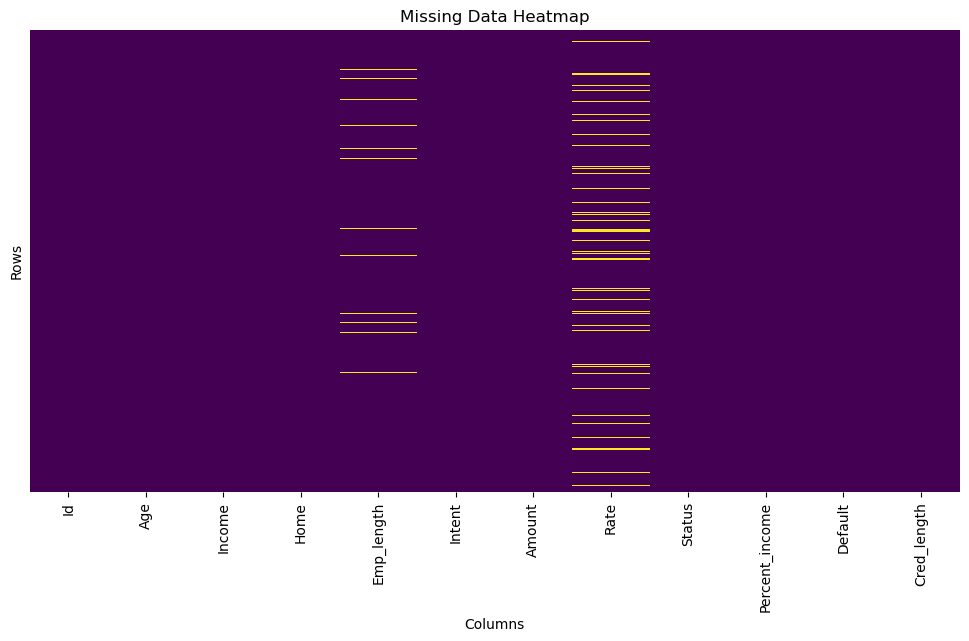

In [24]:
DataVisualizer.plot_missing_data(data)

/home/jovyan/work/utilities.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=data, palette="Set2")


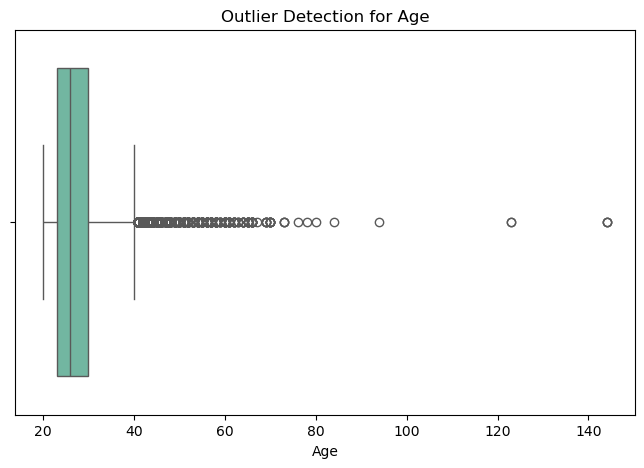

In [25]:
DataVisualizer.plot_outlier_detection(data, column='Age')

/home/jovyan/work/utilities.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, data=data, palette="Set2")


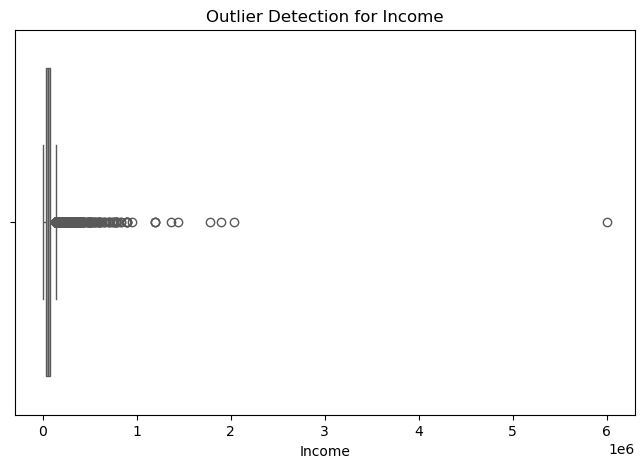

In [27]:
DataVisualizer.plot_outlier_detection(data, column='Income')

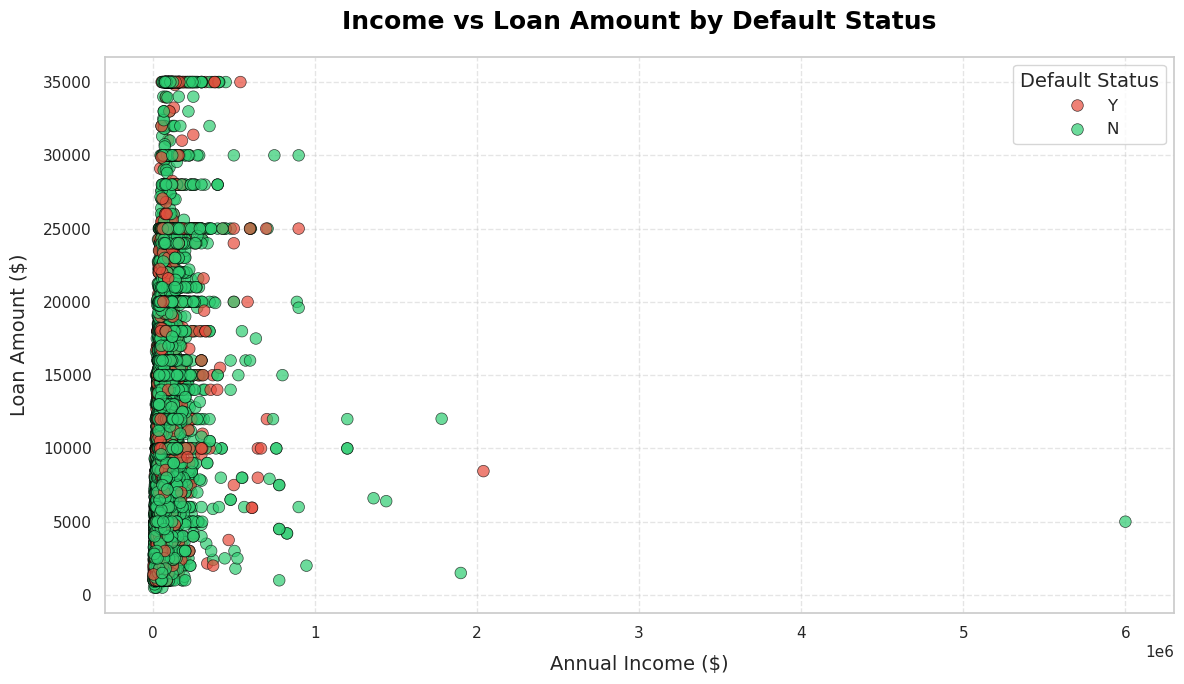

In [49]:
# Creating an aesthetically enhanced scatter plot
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

scatter = sns.scatterplot(
    data=data,
    x='Income',
    y='Amount',
    hue='Default',
    palette={'N': '#2ecc71', 'Y': '#e74c3c'},  # Soft green for "No Default" and red for "Default"
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5,
    s=70  # Adjusting marker size for clarity
)

# Adding titles and labels with aesthetic fonts
scatter.set_title('Income vs Loan Amount by Default Status', fontsize=18, weight='bold', pad=20)
scatter.set_xlabel('Annual Income ($)', fontsize=14, labelpad=10)
scatter.set_ylabel('Loan Amount ($)', fontsize=14, labelpad=10)
scatter.legend(title='Default Status', fontsize=12, title_fontsize=14, loc='upper right')

# Fine-tuning the grid and layout
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()